In [4]:
import time
from collections import namedtuple

import numpy as np
import pandas as pd
# from MulticoreTSNE import MulticoreTSNE as TSNE
from bert_serving.client import BertClient
from bert_serving.server import BertServer
from bert_serving.server.helper import get_args_parser
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

In [11]:
music_sentences = ['Music is an art form, and cultural activity, whose medium is sound', 'In its most general form, the activities describing music as an art form or cultural activity include the creation of works of music (songs, tunes, symphonies, and so on), the criticism of music, the study of the history of music, and the aesthetic examination of music.', 'There are many types of music, including popular music, traditional music, art music, music written for religious ceremonies and work songs such as chanteys', 'Music can be divided into genres (e.g., country music) and genres can be further divided into subgenres (e.g., country blues and pop country are two of the many country subgenres), although the dividing lines and relationships between music genres are often subtle, sometimes open to personal interpretation, and occasionally controversial.']
computer_sentences =  ['A computer is a machine that can be instructed to carry out sequences of arithmetic or logical operations automatically via computer programming.', 'The first digital electronic calculating machines were developed during World War II. The first semiconductor transistors in the late 1940s were followed by the silicon-based MOSFET (MOS transistor) and monolithic integrated circuit (IC) chip technologies in the late 1950s, leading to the microprocessor and the microcomputer revolution in the 1970s.' 'Peripheral devices include input devices (keyboards, mice, joystick, etc.), output devices (monitor screens, printers, etc.), and input/output devices that perform both functions (e.g., the 2000s-era touchscreen).']

In [42]:
sentences = music_sentences + computer_sentences
labels = [0 for _ in music_sentences] + [1 for _ in computer_sentences]

In [13]:
pool_layer = 1
subset_vec_all_layers = []
port = 6006
port_out = 6007

In [16]:
common = [
    '-model_dir', '../uncased_L-12_H-768_A-12/',
    '-num_worker', '2',
    '-port', str(port),
    '-port_out', str(port_out),
    '-max_seq_len', '20',
    # '-client_batch_size', '2048',
    '-max_batch_size', '256',
    # '-num_client', '1',
    '-pooling_strategy', 'REDUCE_MEAN',
    '-pooling_layer', '-2',
    '-gpu_memory_fraction', '0.2',
    '-device','3',
]
args = get_args_parser().parse_args(common)

## 1 LAYER ENCODING

In [49]:
len(sentences)

6

In [46]:
setattr(args, 'pooling_layer', [-1])
server = BertServer(args)
server.start()
print('wait until server is ready...')
time.sleep(20)
print('encoding...')
bc = BertClient(port=port, port_out=port_out, show_server_config=True)
layer = bc.encode(sentences)


I:VENTILATOR:[__i:__i: 67]:freeze, optimize and export graph, could take a while...
I:GRAPHOPT:[gra:opt: 53]:model config: ../uncased_L-12_H-768_A-12/bert_config.json
I:GRAPHOPT:[gra:opt: 56]:checkpoint: ../uncased_L-12_H-768_A-12/bert_model.ckpt
I:GRAPHOPT:[gra:opt: 60]:build graph...



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



I:GRAPHOPT:[gra:opt:132]:load parameters from checkpoint...
I:GRAPHOPT:[gra:opt:136]:optimize...
I:GRAPHOPT:[gra:opt:144]:freeze...
I:GRAPHOPT:[gra:opt:149]:write graph to a tmp file: /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmp58h9qmtm
I:VENTILATOR:[__i:__i: 75]:optimized graph is stored at: /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmp58h9qmtm
I:VENTILATOR:[__i:_ru:129]:bind all sockets
I:VENTILATOR:[__i:_ru:133]:open 8 ventilator-worker sockets
I:VENTILATOR:[__i:_ru:136]:start the sink


wait until server is ready...


I:VENTILATOR:[__i:_ge:222]:get devices
I:SINK:[__i:_ru:306]:ready
W:VENTILATOR:[__i:_ge:246]:no GPU available, fall back to CPU
I:VENTILATOR:[__i:_ge:255]:device map: 
		worker  0 -> cpu
		worker  1 -> cpu
I:WORKER-0:[__i:_ru:531]:use device cpu, load graph from /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmp58h9qmtm
I:WORKER-1:[__i:_ru:531]:use device cpu, load graph from /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmp58h9qmtm


encoding...


I:WORKER-0:[__i:gen:559]:ready and listening!
I:WORKER-1:[__i:gen:559]:ready and listening!
I:VENTILATOR:[__i:_ru:164]:all set, ready to serve request!
I:VENTILATOR:[__i:_ru:180]:new config request	req id: 1	client: b'3af4c877-cdd1-4678-98ed-2d8545a12b4e'
I:SINK:[__i:_ru:348]:send config	client b'3af4c877-cdd1-4678-98ed-2d8545a12b4e'
/Users/lessandro/Coding/AI/BERT/embeddings/venv/lib/python3.7/site-packages/bert_serving/client/__init__.py:299: UserWarning: some of your sentences have more tokens than "max_seq_len=20" set on the server, as consequence you may get less-accurate or truncated embeddings.
here is what you can do:
- disable the length-check by create a new "BertClient(check_length=False)" when you do not want to display this warning
- or, start a new server with a larger "max_seq_len"
  '- or, start a new server with a larger "max_seq_len"' % self.length_limit)
I:VENTILATOR:[__i:_ru:196]:new encode request	req id: 2	size: 6	client: b'3af4c877-cdd1-4678-98ed-2d8545a12b4e'
I:

server config:
                        client	=	3af4c877-cdd1-4678-98ed-2d8545a12b4e
                   num_process	=	3                             
          ventilator -> worker	=	['ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpOkN4bU/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpaBTF5H/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmplfj0DR/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpaB32n9/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpFO9a3L/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpGoqElQ/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpgD6vKt/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpfdodZD/socket']
                worker -> sink	=	ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmp6v249I/socket
           ventilator <-> sink	=	ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpKfmLrT/socket
       

I:WORKER-0:[__i:_ru:543]:job done	size: (6, 768)	client: b'3af4c877-cdd1-4678-98ed-2d8545a12b4e#2'
I:SINK:[__i:_ru:334]:collect b'EMBEDDINGS' b'3af4c877-cdd1-4678-98ed-2d8545a12b4e#2' (E:6/T:0/A:6)
I:SINK:[__i:_ru:357]:send back	size: 6	job id: b'3af4c877-cdd1-4678-98ed-2d8545a12b4e#2'


In [55]:
layer

array([[ 0.20987064,  0.31956345,  0.25079218, ..., -0.15221317,
         0.15055206,  0.29068577],
       [-0.02111052,  0.4687631 ,  0.03027946, ..., -0.25198817,
        -0.09379932,  0.56720257],
       [ 0.27522296,  0.5435899 ,  0.20149453, ...,  0.08233873,
         0.13124003,  0.2907262 ],
       [ 0.01224182, -0.03252828,  0.0662064 , ..., -0.13583335,
         0.2631879 ,  0.32271793],
       [-0.16499576,  0.08829265, -0.12111602, ..., -0.26839983,
        -0.3567505 ,  0.66461146],
       [-0.17282781, -0.03886478, -0.11333249, ..., -0.17703345,
        -0.20369813,  0.11287816]], dtype=float32)

## FULL 12 LAYERS ENCODING

In [17]:
subset_vec_all_layers = []
for pool_layer in range(1, 13):
    setattr(args, 'pooling_layer', [-pool_layer])
    server = BertServer(args)
    server.start()
    print('wait until server is ready...')
    time.sleep(20)
    print('encoding...')
    bc = BertClient(port=port, port_out=port_out, show_server_config=True)
    subset_vec_all_layers.append(bc.encode(sentences))
    bc.close()
    server.close()
    print('done at layer -%d' % pool_layer)

I:VENTILATOR:[__i:__i: 67]:freeze, optimize and export graph, could take a while...
I:GRAPHOPT:[gra:opt: 53]:model config: ../uncased_L-12_H-768_A-12/bert_config.json
I:GRAPHOPT:[gra:opt: 56]:checkpoint: ../uncased_L-12_H-768_A-12/bert_model.ckpt
I:GRAPHOPT:[gra:opt: 60]:build graph...



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



I:GRAPHOPT:[gra:opt:132]:load parameters from checkpoint...
I:GRAPHOPT:[gra:opt:136]:optimize...
I:GRAPHOPT:[gra:opt:144]:freeze...
I:GRAPHOPT:[gra:opt:149]:write graph to a tmp file: /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpcq2wj9vf
I:VENTILATOR:[__i:__i: 75]:optimized graph is stored at: /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpcq2wj9vf
I:VENTILATOR:[__i:_ru:129]:bind all sockets
I:VENTILATOR:[__i:_ru:133]:open 8 ventilator-worker sockets
I:VENTILATOR:[__i:_ru:136]:start the sink


wait until server is ready...


I:VENTILATOR:[__i:_ge:222]:get devices
I:SINK:[__i:_ru:306]:ready
W:VENTILATOR:[__i:_ge:246]:no GPU available, fall back to CPU
I:VENTILATOR:[__i:_ge:255]:device map: 
		worker  0 -> cpu
		worker  1 -> cpu
I:WORKER-0:[__i:_ru:531]:use device cpu, load graph from /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpcq2wj9vf
I:WORKER-1:[__i:_ru:531]:use device cpu, load graph from /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpcq2wj9vf


encoding...


I:WORKER-1:[__i:gen:559]:ready and listening!
I:WORKER-0:[__i:gen:559]:ready and listening!
I:VENTILATOR:[__i:_ru:164]:all set, ready to serve request!
I:VENTILATOR:[__i:_ru:180]:new config request	req id: 1	client: b'91618f5d-aeaf-4524-9abe-ed620e2062f3'
I:SINK:[__i:_ru:348]:send config	client b'91618f5d-aeaf-4524-9abe-ed620e2062f3'
/Users/lessandro/Coding/AI/BERT/embeddings/venv/lib/python3.7/site-packages/bert_serving/client/__init__.py:299: UserWarning: some of your sentences have more tokens than "max_seq_len=20" set on the server, as consequence you may get less-accurate or truncated embeddings.
here is what you can do:
- disable the length-check by create a new "BertClient(check_length=False)" when you do not want to display this warning
- or, start a new server with a larger "max_seq_len"
  '- or, start a new server with a larger "max_seq_len"' % self.length_limit)
I:VENTILATOR:[__i:_ru:196]:new encode request	req id: 2	size: 6	client: b'91618f5d-aeaf-4524-9abe-ed620e2062f3'
I:

server config:
                        client	=	91618f5d-aeaf-4524-9abe-ed620e2062f3
                   num_process	=	3                             
          ventilator -> worker	=	['ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmp4KqYuf/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpuyR9Ec/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmp2FC6nk/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpOj0ORk/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpkPGF9p/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpnTwg8r/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmp4TP78g/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpaJULrq/socket']
                worker -> sink	=	ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpN0WFnf/socket
           ventilator <-> sink	=	ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmp2nJCQe/socket
       

I:WORKER-0:[__i:_ru:543]:job done	size: (6, 768)	client: b'91618f5d-aeaf-4524-9abe-ed620e2062f3#2'
I:SINK:[__i:_ru:334]:collect b'EMBEDDINGS' b'91618f5d-aeaf-4524-9abe-ed620e2062f3#2' (E:6/T:0/A:6)
I:SINK:[__i:_ru:357]:send back	size: 6	job id: b'91618f5d-aeaf-4524-9abe-ed620e2062f3#2'
I:VENTILATOR:[__i:clo: 89]:shutting down...
I:SINK:[__i:clo:274]:shutting down...
I:SINK:[__i:clo:279]:terminated!
I:WORKER-0:[__i:clo:481]:shutting down...
I:WORKER-0:[__i:clo:486]:terminated!
I:WORKER-1:[__i:clo:481]:shutting down...
I:WORKER-1:[__i:clo:486]:terminated!
I:VENTILATOR:[__i:_ru:219]:terminated!
I:VENTILATOR:[__i:__i: 67]:freeze, optimize and export graph, could take a while...


done at layer -1


I:GRAPHOPT:[gra:opt: 53]:model config: ../uncased_L-12_H-768_A-12/bert_config.json
I:GRAPHOPT:[gra:opt: 56]:checkpoint: ../uncased_L-12_H-768_A-12/bert_model.ckpt
I:GRAPHOPT:[gra:opt: 60]:build graph...



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



I:GRAPHOPT:[gra:opt:132]:load parameters from checkpoint...
I:GRAPHOPT:[gra:opt:136]:optimize...
I:GRAPHOPT:[gra:opt:144]:freeze...
I:GRAPHOPT:[gra:opt:149]:write graph to a tmp file: /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpfqculwg0
I:VENTILATOR:[__i:__i: 75]:optimized graph is stored at: /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpfqculwg0
I:VENTILATOR:[__i:_ru:129]:bind all sockets
I:VENTILATOR:[__i:_ru:133]:open 8 ventilator-worker sockets
I:VENTILATOR:[__i:_ru:136]:start the sink


wait until server is ready...


I:VENTILATOR:[__i:_ge:222]:get devices
I:SINK:[__i:_ru:306]:ready
W:VENTILATOR:[__i:_ge:246]:no GPU available, fall back to CPU
I:VENTILATOR:[__i:_ge:255]:device map: 
		worker  0 -> cpu
		worker  1 -> cpu
I:WORKER-0:[__i:_ru:531]:use device cpu, load graph from /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpfqculwg0
I:WORKER-1:[__i:_ru:531]:use device cpu, load graph from /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpfqculwg0
I:WORKER-0:[__i:gen:559]:ready and listening!
I:WORKER-1:[__i:gen:559]:ready and listening!
I:VENTILATOR:[__i:_ru:164]:all set, ready to serve request!
I:VENTILATOR:[__i:_ru:180]:new config request	req id: 1	client: b'0dded245-3fcb-414d-9445-092faa92d4fc'
I:SINK:[__i:_ru:348]:send config	client b'0dded245-3fcb-414d-9445-092faa92d4fc'
/Users/lessandro/Coding/AI/BERT/embeddings/venv/lib/python3.7/site-packages/bert_serving/client/__init__.py:299: UserWarning: some of your sentences have more tokens than "max_seq_len=20" set on the server, as consequence 

encoding...
server config:
                        client	=	0dded245-3fcb-414d-9445-092faa92d4fc
                   num_process	=	3                             
          ventilator -> worker	=	['ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpANoGjP/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmp7oKcCI/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpNsstVX/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpvXBNO6/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpt9etAR/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpwaUesm/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpRHpXIq/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpeZ7LGB/socket']
                worker -> sink	=	ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpcc9zuT/socket
           ventilator <-> sink	=	ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpKYq7MC/so

I:WORKER-0:[__i:_ru:543]:job done	size: (6, 768)	client: b'0dded245-3fcb-414d-9445-092faa92d4fc#2'
I:SINK:[__i:_ru:334]:collect b'EMBEDDINGS' b'0dded245-3fcb-414d-9445-092faa92d4fc#2' (E:6/T:0/A:6)
I:SINK:[__i:_ru:357]:send back	size: 6	job id: b'0dded245-3fcb-414d-9445-092faa92d4fc#2'
I:VENTILATOR:[__i:clo: 89]:shutting down...
I:SINK:[__i:clo:274]:shutting down...
I:SINK:[__i:clo:279]:terminated!
I:WORKER-0:[__i:clo:481]:shutting down...
I:WORKER-0:[__i:clo:486]:terminated!
I:WORKER-1:[__i:clo:481]:shutting down...
I:WORKER-1:[__i:clo:486]:terminated!
I:VENTILATOR:[__i:_ru:219]:terminated!
I:VENTILATOR:[__i:__i: 67]:freeze, optimize and export graph, could take a while...


done at layer -2


I:GRAPHOPT:[gra:opt: 53]:model config: ../uncased_L-12_H-768_A-12/bert_config.json
I:GRAPHOPT:[gra:opt: 56]:checkpoint: ../uncased_L-12_H-768_A-12/bert_model.ckpt
I:GRAPHOPT:[gra:opt: 60]:build graph...



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



I:GRAPHOPT:[gra:opt:132]:load parameters from checkpoint...
I:GRAPHOPT:[gra:opt:136]:optimize...
I:GRAPHOPT:[gra:opt:144]:freeze...
I:GRAPHOPT:[gra:opt:149]:write graph to a tmp file: /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmp0t44_9su
I:VENTILATOR:[__i:__i: 75]:optimized graph is stored at: /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmp0t44_9su
I:VENTILATOR:[__i:_ru:129]:bind all sockets
I:VENTILATOR:[__i:_ru:133]:open 8 ventilator-worker sockets
I:VENTILATOR:[__i:_ru:136]:start the sink


wait until server is ready...


I:VENTILATOR:[__i:_ge:222]:get devices
I:SINK:[__i:_ru:306]:ready
W:VENTILATOR:[__i:_ge:246]:no GPU available, fall back to CPU
I:VENTILATOR:[__i:_ge:255]:device map: 
		worker  0 -> cpu
		worker  1 -> cpu
I:WORKER-0:[__i:_ru:531]:use device cpu, load graph from /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmp0t44_9su
I:WORKER-1:[__i:_ru:531]:use device cpu, load graph from /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmp0t44_9su
I:WORKER-1:[__i:gen:559]:ready and listening!
I:WORKER-0:[__i:gen:559]:ready and listening!
I:VENTILATOR:[__i:_ru:164]:all set, ready to serve request!
I:VENTILATOR:[__i:_ru:180]:new config request	req id: 1	client: b'68104a91-9ffa-4e3c-b785-88c3e2d18424'
I:SINK:[__i:_ru:348]:send config	client b'68104a91-9ffa-4e3c-b785-88c3e2d18424'
/Users/lessandro/Coding/AI/BERT/embeddings/venv/lib/python3.7/site-packages/bert_serving/client/__init__.py:299: UserWarning: some of your sentences have more tokens than "max_seq_len=20" set on the server, as consequence 

encoding...
server config:
                        client	=	68104a91-9ffa-4e3c-b785-88c3e2d18424
                   num_process	=	3                             
          ventilator -> worker	=	['ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpL1ozSL/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpzRcArP/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpLQhhVg/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpRoaiQf/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmp6xvRCJ/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpyPcfvY/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpoDrWMK/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmp58ww5Y/socket']
                worker -> sink	=	ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpUOP8IQ/socket
           ventilator <-> sink	=	ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpnqWmLB/so

I:WORKER-0:[__i:_ru:543]:job done	size: (6, 768)	client: b'68104a91-9ffa-4e3c-b785-88c3e2d18424#2'
I:SINK:[__i:_ru:334]:collect b'EMBEDDINGS' b'68104a91-9ffa-4e3c-b785-88c3e2d18424#2' (E:6/T:0/A:6)
I:SINK:[__i:_ru:357]:send back	size: 6	job id: b'68104a91-9ffa-4e3c-b785-88c3e2d18424#2'
I:VENTILATOR:[__i:clo: 89]:shutting down...
I:SINK:[__i:clo:274]:shutting down...
I:SINK:[__i:clo:279]:terminated!
I:WORKER-0:[__i:clo:481]:shutting down...
I:WORKER-0:[__i:clo:486]:terminated!
I:WORKER-1:[__i:clo:481]:shutting down...
I:WORKER-1:[__i:clo:486]:terminated!
I:VENTILATOR:[__i:_ru:219]:terminated!
I:VENTILATOR:[__i:__i: 67]:freeze, optimize and export graph, could take a while...


done at layer -3


I:GRAPHOPT:[gra:opt: 53]:model config: ../uncased_L-12_H-768_A-12/bert_config.json
I:GRAPHOPT:[gra:opt: 56]:checkpoint: ../uncased_L-12_H-768_A-12/bert_model.ckpt
I:GRAPHOPT:[gra:opt: 60]:build graph...



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



I:GRAPHOPT:[gra:opt:132]:load parameters from checkpoint...
I:GRAPHOPT:[gra:opt:136]:optimize...
I:GRAPHOPT:[gra:opt:144]:freeze...
I:GRAPHOPT:[gra:opt:149]:write graph to a tmp file: /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmp8m229k8q
I:VENTILATOR:[__i:__i: 75]:optimized graph is stored at: /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmp8m229k8q
I:VENTILATOR:[__i:_ru:129]:bind all sockets
I:VENTILATOR:[__i:_ru:133]:open 8 ventilator-worker sockets
I:VENTILATOR:[__i:_ru:136]:start the sink


wait until server is ready...


I:VENTILATOR:[__i:_ge:222]:get devices
I:SINK:[__i:_ru:306]:ready
W:VENTILATOR:[__i:_ge:246]:no GPU available, fall back to CPU
I:VENTILATOR:[__i:_ge:255]:device map: 
		worker  0 -> cpu
		worker  1 -> cpu
I:WORKER-0:[__i:_ru:531]:use device cpu, load graph from /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmp8m229k8q
I:WORKER-1:[__i:_ru:531]:use device cpu, load graph from /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmp8m229k8q
I:WORKER-0:[__i:gen:559]:ready and listening!
I:WORKER-1:[__i:gen:559]:ready and listening!
I:VENTILATOR:[__i:_ru:164]:all set, ready to serve request!
I:VENTILATOR:[__i:_ru:180]:new config request	req id: 1	client: b'459e93e8-2ab6-4d94-9f9f-cb6ec9ad4ad6'
I:SINK:[__i:_ru:348]:send config	client b'459e93e8-2ab6-4d94-9f9f-cb6ec9ad4ad6'
/Users/lessandro/Coding/AI/BERT/embeddings/venv/lib/python3.7/site-packages/bert_serving/client/__init__.py:299: UserWarning: some of your sentences have more tokens than "max_seq_len=20" set on the server, as consequence 

encoding...
server config:
                        client	=	459e93e8-2ab6-4d94-9f9f-cb6ec9ad4ad6
                   num_process	=	3                             
          ventilator -> worker	=	['ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpFW6kpR/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpIpnr12/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpG8XklT/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmp3R32cT/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpIfyfbU/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpgfJwlf/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpGlbVYY/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmp5qpqoh/socket']
                worker -> sink	=	ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmprzzJi7/socket
           ventilator <-> sink	=	ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpBmU5rb/so

I:WORKER-0:[__i:_ru:543]:job done	size: (6, 768)	client: b'459e93e8-2ab6-4d94-9f9f-cb6ec9ad4ad6#2'
I:SINK:[__i:_ru:334]:collect b'EMBEDDINGS' b'459e93e8-2ab6-4d94-9f9f-cb6ec9ad4ad6#2' (E:6/T:0/A:6)
I:SINK:[__i:_ru:357]:send back	size: 6	job id: b'459e93e8-2ab6-4d94-9f9f-cb6ec9ad4ad6#2'
I:VENTILATOR:[__i:clo: 89]:shutting down...
I:SINK:[__i:clo:274]:shutting down...
I:SINK:[__i:clo:279]:terminated!
I:WORKER-0:[__i:clo:481]:shutting down...
I:WORKER-0:[__i:clo:486]:terminated!
I:WORKER-1:[__i:clo:481]:shutting down...
I:WORKER-1:[__i:clo:486]:terminated!
I:VENTILATOR:[__i:_ru:219]:terminated!
I:VENTILATOR:[__i:__i: 67]:freeze, optimize and export graph, could take a while...


done at layer -4


I:GRAPHOPT:[gra:opt: 53]:model config: ../uncased_L-12_H-768_A-12/bert_config.json
I:GRAPHOPT:[gra:opt: 56]:checkpoint: ../uncased_L-12_H-768_A-12/bert_model.ckpt
I:GRAPHOPT:[gra:opt: 60]:build graph...



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



I:GRAPHOPT:[gra:opt:132]:load parameters from checkpoint...
I:GRAPHOPT:[gra:opt:136]:optimize...
I:GRAPHOPT:[gra:opt:144]:freeze...
I:GRAPHOPT:[gra:opt:149]:write graph to a tmp file: /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpx7sujbhd
I:VENTILATOR:[__i:__i: 75]:optimized graph is stored at: /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpx7sujbhd
I:VENTILATOR:[__i:_ru:129]:bind all sockets
I:VENTILATOR:[__i:_ru:133]:open 8 ventilator-worker sockets
I:VENTILATOR:[__i:_ru:136]:start the sink


wait until server is ready...


I:VENTILATOR:[__i:_ge:222]:get devices
I:SINK:[__i:_ru:306]:ready
W:VENTILATOR:[__i:_ge:246]:no GPU available, fall back to CPU
I:VENTILATOR:[__i:_ge:255]:device map: 
		worker  0 -> cpu
		worker  1 -> cpu
I:WORKER-0:[__i:_ru:531]:use device cpu, load graph from /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpx7sujbhd
I:WORKER-1:[__i:_ru:531]:use device cpu, load graph from /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpx7sujbhd
I:WORKER-1:[__i:gen:559]:ready and listening!
I:WORKER-0:[__i:gen:559]:ready and listening!
I:VENTILATOR:[__i:_ru:164]:all set, ready to serve request!
I:VENTILATOR:[__i:_ru:180]:new config request	req id: 1	client: b'5ce79d8d-352f-4518-8acf-2999605ba6a5'
I:SINK:[__i:_ru:348]:send config	client b'5ce79d8d-352f-4518-8acf-2999605ba6a5'
/Users/lessandro/Coding/AI/BERT/embeddings/venv/lib/python3.7/site-packages/bert_serving/client/__init__.py:299: UserWarning: some of your sentences have more tokens than "max_seq_len=20" set on the server, as consequence 

encoding...
server config:
                        client	=	5ce79d8d-352f-4518-8acf-2999605ba6a5
                   num_process	=	3                             
          ventilator -> worker	=	['ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmp3LBvA5/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpclEcFM/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmp3QzCNI/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpHVNoDh/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpG1YSYL/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpSxzrJ5/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpuV1Jkl/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpEwrFvx/socket']
                worker -> sink	=	ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpF1ffhJ/socket
           ventilator <-> sink	=	ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpjuht4i/so

I:WORKER-0:[__i:_ru:543]:job done	size: (6, 768)	client: b'5ce79d8d-352f-4518-8acf-2999605ba6a5#2'
I:SINK:[__i:_ru:334]:collect b'EMBEDDINGS' b'5ce79d8d-352f-4518-8acf-2999605ba6a5#2' (E:6/T:0/A:6)
I:SINK:[__i:_ru:357]:send back	size: 6	job id: b'5ce79d8d-352f-4518-8acf-2999605ba6a5#2'
I:VENTILATOR:[__i:clo: 89]:shutting down...
I:SINK:[__i:clo:274]:shutting down...
I:SINK:[__i:clo:279]:terminated!
I:WORKER-0:[__i:clo:481]:shutting down...
I:WORKER-0:[__i:clo:486]:terminated!
I:WORKER-1:[__i:clo:481]:shutting down...
I:WORKER-1:[__i:clo:486]:terminated!
I:VENTILATOR:[__i:_ru:219]:terminated!
I:VENTILATOR:[__i:__i: 67]:freeze, optimize and export graph, could take a while...


done at layer -5


I:GRAPHOPT:[gra:opt: 53]:model config: ../uncased_L-12_H-768_A-12/bert_config.json
I:GRAPHOPT:[gra:opt: 56]:checkpoint: ../uncased_L-12_H-768_A-12/bert_model.ckpt
I:GRAPHOPT:[gra:opt: 60]:build graph...



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



I:GRAPHOPT:[gra:opt:132]:load parameters from checkpoint...
I:GRAPHOPT:[gra:opt:136]:optimize...
I:GRAPHOPT:[gra:opt:144]:freeze...
I:GRAPHOPT:[gra:opt:149]:write graph to a tmp file: /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpp9kah6oi
I:VENTILATOR:[__i:__i: 75]:optimized graph is stored at: /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpp9kah6oi
I:VENTILATOR:[__i:_ru:129]:bind all sockets
I:VENTILATOR:[__i:_ru:133]:open 8 ventilator-worker sockets
I:VENTILATOR:[__i:_ru:136]:start the sink


wait until server is ready...


I:VENTILATOR:[__i:_ge:222]:get devices
I:SINK:[__i:_ru:306]:ready
W:VENTILATOR:[__i:_ge:246]:no GPU available, fall back to CPU
I:VENTILATOR:[__i:_ge:255]:device map: 
		worker  0 -> cpu
		worker  1 -> cpu
I:WORKER-0:[__i:_ru:531]:use device cpu, load graph from /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpp9kah6oi
I:WORKER-1:[__i:_ru:531]:use device cpu, load graph from /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpp9kah6oi
I:WORKER-0:[__i:gen:559]:ready and listening!
I:WORKER-1:[__i:gen:559]:ready and listening!
I:VENTILATOR:[__i:_ru:164]:all set, ready to serve request!
I:VENTILATOR:[__i:_ru:180]:new config request	req id: 1	client: b'f2f4aaf9-3702-45ec-a054-5781551d6c10'
I:SINK:[__i:_ru:348]:send config	client b'f2f4aaf9-3702-45ec-a054-5781551d6c10'
/Users/lessandro/Coding/AI/BERT/embeddings/venv/lib/python3.7/site-packages/bert_serving/client/__init__.py:299: UserWarning: some of your sentences have more tokens than "max_seq_len=20" set on the server, as consequence 

encoding...
server config:
                        client	=	f2f4aaf9-3702-45ec-a054-5781551d6c10
                   num_process	=	3                             
          ventilator -> worker	=	['ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpI7W9TK/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpZQ9XAL/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpW0teJn/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpuOuS8U/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpYomoyx/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpS4GXv7/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpo3MuTG/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmphkEKXS/socket']
                worker -> sink	=	ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpl9mXC6/socket
           ventilator <-> sink	=	ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpihcLhg/so

I:WORKER-0:[__i:_ru:543]:job done	size: (6, 768)	client: b'f2f4aaf9-3702-45ec-a054-5781551d6c10#2'
I:SINK:[__i:_ru:334]:collect b'EMBEDDINGS' b'f2f4aaf9-3702-45ec-a054-5781551d6c10#2' (E:6/T:0/A:6)
I:SINK:[__i:_ru:357]:send back	size: 6	job id: b'f2f4aaf9-3702-45ec-a054-5781551d6c10#2'
I:VENTILATOR:[__i:clo: 89]:shutting down...
I:SINK:[__i:clo:274]:shutting down...
I:SINK:[__i:clo:279]:terminated!
I:WORKER-0:[__i:clo:481]:shutting down...
I:WORKER-0:[__i:clo:486]:terminated!
I:WORKER-1:[__i:clo:481]:shutting down...
I:WORKER-1:[__i:clo:486]:terminated!
I:VENTILATOR:[__i:_ru:219]:terminated!
I:VENTILATOR:[__i:__i: 67]:freeze, optimize and export graph, could take a while...


done at layer -6


I:GRAPHOPT:[gra:opt: 53]:model config: ../uncased_L-12_H-768_A-12/bert_config.json
I:GRAPHOPT:[gra:opt: 56]:checkpoint: ../uncased_L-12_H-768_A-12/bert_model.ckpt
I:GRAPHOPT:[gra:opt: 60]:build graph...



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



I:GRAPHOPT:[gra:opt:132]:load parameters from checkpoint...
I:GRAPHOPT:[gra:opt:136]:optimize...
I:GRAPHOPT:[gra:opt:144]:freeze...
I:GRAPHOPT:[gra:opt:149]:write graph to a tmp file: /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpejifvcqw
I:VENTILATOR:[__i:__i: 75]:optimized graph is stored at: /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpejifvcqw
I:VENTILATOR:[__i:_ru:129]:bind all sockets
I:VENTILATOR:[__i:_ru:133]:open 8 ventilator-worker sockets
I:VENTILATOR:[__i:_ru:136]:start the sink


wait until server is ready...


I:VENTILATOR:[__i:_ge:222]:get devices
I:SINK:[__i:_ru:306]:ready
W:VENTILATOR:[__i:_ge:246]:no GPU available, fall back to CPU
I:VENTILATOR:[__i:_ge:255]:device map: 
		worker  0 -> cpu
		worker  1 -> cpu
I:WORKER-0:[__i:_ru:531]:use device cpu, load graph from /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpejifvcqw
I:WORKER-1:[__i:_ru:531]:use device cpu, load graph from /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpejifvcqw
I:WORKER-1:[__i:gen:559]:ready and listening!
I:WORKER-0:[__i:gen:559]:ready and listening!
I:VENTILATOR:[__i:_ru:164]:all set, ready to serve request!
I:VENTILATOR:[__i:_ru:180]:new config request	req id: 1	client: b'6261e291-1172-4a6f-b992-b695a4902b63'
I:SINK:[__i:_ru:348]:send config	client b'6261e291-1172-4a6f-b992-b695a4902b63'
/Users/lessandro/Coding/AI/BERT/embeddings/venv/lib/python3.7/site-packages/bert_serving/client/__init__.py:299: UserWarning: some of your sentences have more tokens than "max_seq_len=20" set on the server, as consequence 

encoding...
server config:
                        client	=	6261e291-1172-4a6f-b992-b695a4902b63
                   num_process	=	3                             
          ventilator -> worker	=	['ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpPg9Ohx/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpwe1lAP/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpxZVEkL/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpx3rpKw/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpYeSzlZ/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpDLWmVa/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpWUhM1Y/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmphmYTnp/socket']
                worker -> sink	=	ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmp7ywy2k/socket
           ventilator <-> sink	=	ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpg1oNTX/so

I:WORKER-0:[__i:_ru:543]:job done	size: (6, 768)	client: b'6261e291-1172-4a6f-b992-b695a4902b63#2'
I:SINK:[__i:_ru:334]:collect b'EMBEDDINGS' b'6261e291-1172-4a6f-b992-b695a4902b63#2' (E:6/T:0/A:6)
I:SINK:[__i:_ru:357]:send back	size: 6	job id: b'6261e291-1172-4a6f-b992-b695a4902b63#2'
I:VENTILATOR:[__i:clo: 89]:shutting down...
I:SINK:[__i:clo:274]:shutting down...
I:SINK:[__i:clo:279]:terminated!
I:WORKER-0:[__i:clo:481]:shutting down...
I:WORKER-0:[__i:clo:486]:terminated!
I:WORKER-1:[__i:clo:481]:shutting down...
I:WORKER-1:[__i:clo:486]:terminated!
I:VENTILATOR:[__i:_ru:219]:terminated!
I:VENTILATOR:[__i:__i: 67]:freeze, optimize and export graph, could take a while...


done at layer -7


I:GRAPHOPT:[gra:opt: 53]:model config: ../uncased_L-12_H-768_A-12/bert_config.json
I:GRAPHOPT:[gra:opt: 56]:checkpoint: ../uncased_L-12_H-768_A-12/bert_model.ckpt
I:GRAPHOPT:[gra:opt: 60]:build graph...



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



I:GRAPHOPT:[gra:opt:132]:load parameters from checkpoint...
I:GRAPHOPT:[gra:opt:136]:optimize...
I:GRAPHOPT:[gra:opt:144]:freeze...
I:GRAPHOPT:[gra:opt:149]:write graph to a tmp file: /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpab5_w_nl
I:VENTILATOR:[__i:__i: 75]:optimized graph is stored at: /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpab5_w_nl
I:VENTILATOR:[__i:_ru:129]:bind all sockets
I:VENTILATOR:[__i:_ru:133]:open 8 ventilator-worker sockets
I:VENTILATOR:[__i:_ru:136]:start the sink


wait until server is ready...


I:VENTILATOR:[__i:_ge:222]:get devices
I:SINK:[__i:_ru:306]:ready
W:VENTILATOR:[__i:_ge:246]:no GPU available, fall back to CPU
I:VENTILATOR:[__i:_ge:255]:device map: 
		worker  0 -> cpu
		worker  1 -> cpu
I:WORKER-0:[__i:_ru:531]:use device cpu, load graph from /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpab5_w_nl
I:WORKER-1:[__i:_ru:531]:use device cpu, load graph from /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpab5_w_nl
I:WORKER-1:[__i:gen:559]:ready and listening!
I:WORKER-0:[__i:gen:559]:ready and listening!
I:VENTILATOR:[__i:_ru:164]:all set, ready to serve request!
I:VENTILATOR:[__i:_ru:180]:new config request	req id: 1	client: b'2f109881-b956-4943-b845-e89679f21a21'
I:SINK:[__i:_ru:348]:send config	client b'2f109881-b956-4943-b845-e89679f21a21'
/Users/lessandro/Coding/AI/BERT/embeddings/venv/lib/python3.7/site-packages/bert_serving/client/__init__.py:299: UserWarning: some of your sentences have more tokens than "max_seq_len=20" set on the server, as consequence 

encoding...
server config:
                        client	=	2f109881-b956-4943-b845-e89679f21a21
                   num_process	=	3                             
          ventilator -> worker	=	['ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpUQ0wLB/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpGSwH17/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpIRyf8e/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpBcKpNc/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmp9Lnsem/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmp1PNY9y/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpLteqNE/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpeE7DDI/socket']
                worker -> sink	=	ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpYeS78P/socket
           ventilator <-> sink	=	ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpbYeEn8/so

I:WORKER-0:[__i:_ru:543]:job done	size: (6, 768)	client: b'2f109881-b956-4943-b845-e89679f21a21#2'
I:SINK:[__i:_ru:334]:collect b'EMBEDDINGS' b'2f109881-b956-4943-b845-e89679f21a21#2' (E:6/T:0/A:6)
I:SINK:[__i:_ru:357]:send back	size: 6	job id: b'2f109881-b956-4943-b845-e89679f21a21#2'
I:VENTILATOR:[__i:clo: 89]:shutting down...
I:SINK:[__i:clo:274]:shutting down...
I:SINK:[__i:clo:279]:terminated!
I:WORKER-0:[__i:clo:481]:shutting down...
I:WORKER-0:[__i:clo:486]:terminated!
I:WORKER-1:[__i:clo:481]:shutting down...
I:WORKER-1:[__i:clo:486]:terminated!
I:VENTILATOR:[__i:_ru:219]:terminated!
I:VENTILATOR:[__i:__i: 67]:freeze, optimize and export graph, could take a while...


done at layer -8


I:GRAPHOPT:[gra:opt: 53]:model config: ../uncased_L-12_H-768_A-12/bert_config.json
I:GRAPHOPT:[gra:opt: 56]:checkpoint: ../uncased_L-12_H-768_A-12/bert_model.ckpt
I:GRAPHOPT:[gra:opt: 60]:build graph...



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



I:GRAPHOPT:[gra:opt:132]:load parameters from checkpoint...
I:GRAPHOPT:[gra:opt:136]:optimize...
I:GRAPHOPT:[gra:opt:144]:freeze...
I:GRAPHOPT:[gra:opt:149]:write graph to a tmp file: /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpkhrby30d
I:VENTILATOR:[__i:__i: 75]:optimized graph is stored at: /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpkhrby30d
I:VENTILATOR:[__i:_ru:129]:bind all sockets
I:VENTILATOR:[__i:_ru:133]:open 8 ventilator-worker sockets
I:VENTILATOR:[__i:_ru:136]:start the sink


wait until server is ready...


I:VENTILATOR:[__i:_ge:222]:get devices
I:SINK:[__i:_ru:306]:ready
W:VENTILATOR:[__i:_ge:246]:no GPU available, fall back to CPU
I:VENTILATOR:[__i:_ge:255]:device map: 
		worker  0 -> cpu
		worker  1 -> cpu
I:WORKER-0:[__i:_ru:531]:use device cpu, load graph from /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpkhrby30d
I:WORKER-1:[__i:_ru:531]:use device cpu, load graph from /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpkhrby30d
I:WORKER-0:[__i:gen:559]:ready and listening!
I:WORKER-1:[__i:gen:559]:ready and listening!
I:VENTILATOR:[__i:_ru:164]:all set, ready to serve request!
I:VENTILATOR:[__i:_ru:180]:new config request	req id: 1	client: b'055cad43-dace-4ff0-9f74-9559ef38fb67'
I:SINK:[__i:_ru:348]:send config	client b'055cad43-dace-4ff0-9f74-9559ef38fb67'
/Users/lessandro/Coding/AI/BERT/embeddings/venv/lib/python3.7/site-packages/bert_serving/client/__init__.py:299: UserWarning: some of your sentences have more tokens than "max_seq_len=20" set on the server, as consequence 

encoding...
server config:
                        client	=	055cad43-dace-4ff0-9f74-9559ef38fb67
                   num_process	=	3                             
          ventilator -> worker	=	['ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmp35PSgM/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpQnEE6h/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmp0pFFgC/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpmlPmKg/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmp52G43a/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpltJjXh/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpCFQSrU/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpHYzyUb/socket']
                worker -> sink	=	ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpJk2U42/socket
           ventilator <-> sink	=	ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmp0aJBaI/so

I:WORKER-0:[__i:_ru:543]:job done	size: (6, 768)	client: b'055cad43-dace-4ff0-9f74-9559ef38fb67#2'
I:SINK:[__i:_ru:334]:collect b'EMBEDDINGS' b'055cad43-dace-4ff0-9f74-9559ef38fb67#2' (E:6/T:0/A:6)
I:SINK:[__i:_ru:357]:send back	size: 6	job id: b'055cad43-dace-4ff0-9f74-9559ef38fb67#2'
I:VENTILATOR:[__i:clo: 89]:shutting down...
I:SINK:[__i:clo:274]:shutting down...
I:SINK:[__i:clo:279]:terminated!
I:WORKER-0:[__i:clo:481]:shutting down...
I:WORKER-0:[__i:clo:486]:terminated!
I:WORKER-1:[__i:clo:481]:shutting down...
I:WORKER-1:[__i:clo:486]:terminated!
I:VENTILATOR:[__i:_ru:219]:terminated!
I:VENTILATOR:[__i:__i: 67]:freeze, optimize and export graph, could take a while...


done at layer -9


I:GRAPHOPT:[gra:opt: 53]:model config: ../uncased_L-12_H-768_A-12/bert_config.json
I:GRAPHOPT:[gra:opt: 56]:checkpoint: ../uncased_L-12_H-768_A-12/bert_model.ckpt
I:GRAPHOPT:[gra:opt: 60]:build graph...



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



I:GRAPHOPT:[gra:opt:132]:load parameters from checkpoint...
I:GRAPHOPT:[gra:opt:136]:optimize...
I:GRAPHOPT:[gra:opt:144]:freeze...
I:GRAPHOPT:[gra:opt:149]:write graph to a tmp file: /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpd2i5ux6e
I:VENTILATOR:[__i:__i: 75]:optimized graph is stored at: /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpd2i5ux6e
I:VENTILATOR:[__i:_ru:129]:bind all sockets
I:VENTILATOR:[__i:_ru:133]:open 8 ventilator-worker sockets
I:VENTILATOR:[__i:_ru:136]:start the sink


wait until server is ready...


I:VENTILATOR:[__i:_ge:222]:get devices
I:SINK:[__i:_ru:306]:ready
W:VENTILATOR:[__i:_ge:246]:no GPU available, fall back to CPU
I:VENTILATOR:[__i:_ge:255]:device map: 
		worker  0 -> cpu
		worker  1 -> cpu
I:WORKER-0:[__i:_ru:531]:use device cpu, load graph from /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpd2i5ux6e
I:WORKER-1:[__i:_ru:531]:use device cpu, load graph from /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpd2i5ux6e
I:WORKER-0:[__i:gen:559]:ready and listening!
I:WORKER-1:[__i:gen:559]:ready and listening!
I:VENTILATOR:[__i:_ru:164]:all set, ready to serve request!
I:VENTILATOR:[__i:_ru:180]:new config request	req id: 1	client: b'c944f0c2-1212-43f5-a587-d8176e8c971f'
I:SINK:[__i:_ru:348]:send config	client b'c944f0c2-1212-43f5-a587-d8176e8c971f'
/Users/lessandro/Coding/AI/BERT/embeddings/venv/lib/python3.7/site-packages/bert_serving/client/__init__.py:299: UserWarning: some of your sentences have more tokens than "max_seq_len=20" set on the server, as consequence 

encoding...
server config:
                        client	=	c944f0c2-1212-43f5-a587-d8176e8c971f
                   num_process	=	3                             
          ventilator -> worker	=	['ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmph1iuw2/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpEnaJDZ/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmp7yzrAJ/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpeThfxc/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmp7ZTa17/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpS1g0iw/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpuwnqck/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpOXd8t6/socket']
                worker -> sink	=	ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpjDee4j/socket
           ventilator <-> sink	=	ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpATCojh/so

I:WORKER-0:[__i:clo:486]:terminated!
I:WORKER-1:[__i:clo:481]:shutting down...
I:WORKER-1:[__i:clo:486]:terminated!
I:VENTILATOR:[__i:_ru:219]:terminated!
I:VENTILATOR:[__i:__i: 67]:freeze, optimize and export graph, could take a while...


done at layer -10


I:GRAPHOPT:[gra:opt: 53]:model config: ../uncased_L-12_H-768_A-12/bert_config.json
I:GRAPHOPT:[gra:opt: 56]:checkpoint: ../uncased_L-12_H-768_A-12/bert_model.ckpt
I:GRAPHOPT:[gra:opt: 60]:build graph...



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



I:GRAPHOPT:[gra:opt:132]:load parameters from checkpoint...
I:GRAPHOPT:[gra:opt:136]:optimize...
I:GRAPHOPT:[gra:opt:144]:freeze...
I:GRAPHOPT:[gra:opt:149]:write graph to a tmp file: /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpyuwio8oa
I:VENTILATOR:[__i:__i: 75]:optimized graph is stored at: /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpyuwio8oa
I:VENTILATOR:[__i:_ru:129]:bind all sockets
I:VENTILATOR:[__i:_ru:133]:open 8 ventilator-worker sockets
I:VENTILATOR:[__i:_ru:136]:start the sink


wait until server is ready...


I:VENTILATOR:[__i:_ge:222]:get devices
I:SINK:[__i:_ru:306]:ready
W:VENTILATOR:[__i:_ge:246]:no GPU available, fall back to CPU
I:VENTILATOR:[__i:_ge:255]:device map: 
		worker  0 -> cpu
		worker  1 -> cpu
I:WORKER-0:[__i:_ru:531]:use device cpu, load graph from /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpyuwio8oa
I:WORKER-1:[__i:_ru:531]:use device cpu, load graph from /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpyuwio8oa
I:WORKER-0:[__i:gen:559]:ready and listening!
I:WORKER-1:[__i:gen:559]:ready and listening!
I:VENTILATOR:[__i:_ru:164]:all set, ready to serve request!
I:VENTILATOR:[__i:_ru:180]:new config request	req id: 1	client: b'3fe6aedc-4fc3-4d9c-8380-f81ec1c19b5c'
I:SINK:[__i:_ru:348]:send config	client b'3fe6aedc-4fc3-4d9c-8380-f81ec1c19b5c'
/Users/lessandro/Coding/AI/BERT/embeddings/venv/lib/python3.7/site-packages/bert_serving/client/__init__.py:299: UserWarning: some of your sentences have more tokens than "max_seq_len=20" set on the server, as consequence 

encoding...
server config:
                        client	=	3fe6aedc-4fc3-4d9c-8380-f81ec1c19b5c
                   num_process	=	3                             
          ventilator -> worker	=	['ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpgsrWGM/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmp25EWZ6/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpt6dLn9/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmplsU0WU/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpqujkKl/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpzYkLR6/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmp2jqu14/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmp7qVlky/socket']
                worker -> sink	=	ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpe42XU0/socket
           ventilator <-> sink	=	ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmp1cqgNd/so

I:WORKER-0:[__i:clo:486]:terminated!
I:WORKER-1:[__i:clo:481]:shutting down...
I:WORKER-1:[__i:clo:486]:terminated!
I:VENTILATOR:[__i:_ru:219]:terminated!
I:VENTILATOR:[__i:__i: 67]:freeze, optimize and export graph, could take a while...


done at layer -11


I:GRAPHOPT:[gra:opt: 53]:model config: ../uncased_L-12_H-768_A-12/bert_config.json
I:GRAPHOPT:[gra:opt: 56]:checkpoint: ../uncased_L-12_H-768_A-12/bert_model.ckpt
I:GRAPHOPT:[gra:opt: 60]:build graph...



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



I:GRAPHOPT:[gra:opt:132]:load parameters from checkpoint...
I:GRAPHOPT:[gra:opt:136]:optimize...
I:GRAPHOPT:[gra:opt:144]:freeze...
I:GRAPHOPT:[gra:opt:149]:write graph to a tmp file: /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmprxeqak5t
I:VENTILATOR:[__i:__i: 75]:optimized graph is stored at: /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmprxeqak5t
I:VENTILATOR:[__i:_ru:129]:bind all sockets
I:VENTILATOR:[__i:_ru:133]:open 8 ventilator-worker sockets
I:VENTILATOR:[__i:_ru:136]:start the sink


wait until server is ready...


I:VENTILATOR:[__i:_ge:222]:get devices
I:SINK:[__i:_ru:306]:ready
W:VENTILATOR:[__i:_ge:246]:no GPU available, fall back to CPU
I:VENTILATOR:[__i:_ge:255]:device map: 
		worker  0 -> cpu
		worker  1 -> cpu
I:WORKER-0:[__i:_ru:531]:use device cpu, load graph from /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmprxeqak5t
I:WORKER-1:[__i:_ru:531]:use device cpu, load graph from /var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmprxeqak5t
I:WORKER-0:[__i:gen:559]:ready and listening!
I:WORKER-1:[__i:gen:559]:ready and listening!
I:VENTILATOR:[__i:_ru:164]:all set, ready to serve request!
I:VENTILATOR:[__i:_ru:180]:new config request	req id: 1	client: b'c3b7703f-9ce2-4817-a308-51e3333c70b6'
I:SINK:[__i:_ru:348]:send config	client b'c3b7703f-9ce2-4817-a308-51e3333c70b6'
/Users/lessandro/Coding/AI/BERT/embeddings/venv/lib/python3.7/site-packages/bert_serving/client/__init__.py:299: UserWarning: some of your sentences have more tokens than "max_seq_len=20" set on the server, as consequence 

encoding...
server config:
                        client	=	c3b7703f-9ce2-4817-a308-51e3333c70b6
                   num_process	=	3                             
          ventilator -> worker	=	['ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpn3CjrT/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmph3nmEO/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpUbXGnk/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpG7KegU/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpxe7DOS/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpbNgSIp/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpu0azZg/socket', 'ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpTgj0BI/socket']
                worker -> sink	=	ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpJAiM9q/socket
           ventilator <-> sink	=	ipc:///var/folders/tt/kktdtxb905n0tqr92f6dnn540000gn/T/tmpVjitK8/so

I:WORKER-0:[__i:clo:486]:terminated!
I:WORKER-1:[__i:clo:481]:shutting down...
I:WORKER-1:[__i:clo:486]:terminated!
I:VENTILATOR:[__i:_ru:219]:terminated!


done at layer -12


In [18]:
len(subset_vec_all_layers)

12

Size of a embedding is N * H where N is number of sentences and H is the hidden layer size

subset_vec_all_layers[0].shape 

In [21]:
stacked_subset_vec_all_layers = np.stack(subset_vec_all_layers)

In [22]:
pca_embed = [PCA(n_components=2).fit_transform(v) for v in subset_vec_all_layers]

The pca embed shape is N * 2, where N is the number of sentences and 2 is the reduced (768 -> 2) dimensionality

In [24]:
pca_embed[0].shape

(6, 2)

In [59]:
def visualise_pca(embed, vis_alg='PCA', pool_alg='REDUCE_MEAN'):
    plt.close()
    fig = plt.figure()
    plt.rcParams['figure.figsize'] = [21, 7]
    for idx, ebd in enumerate(embed):
        ax = plt.subplot(2, 6, idx + 1)
        vis_x = ebd[:, 0]
        vis_y = ebd[:, 1]
        plt.scatter(vis_x, vis_y, c=labels, cmap=ListedColormap(["blue", "green"]))
        ax.set_title('pool_layer=-%d' % (idx + 1))
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1, right=0.95, top=0.9)
    cax = plt.axes([0.96, 0.1, 0.01, 0.3])
    fig.suptitle('%s visualization of BERT layers using "bert-as-service" (-pool_strategy=%s)' % (vis_alg, pool_alg),
                 fontsize=14)
    plt.show()

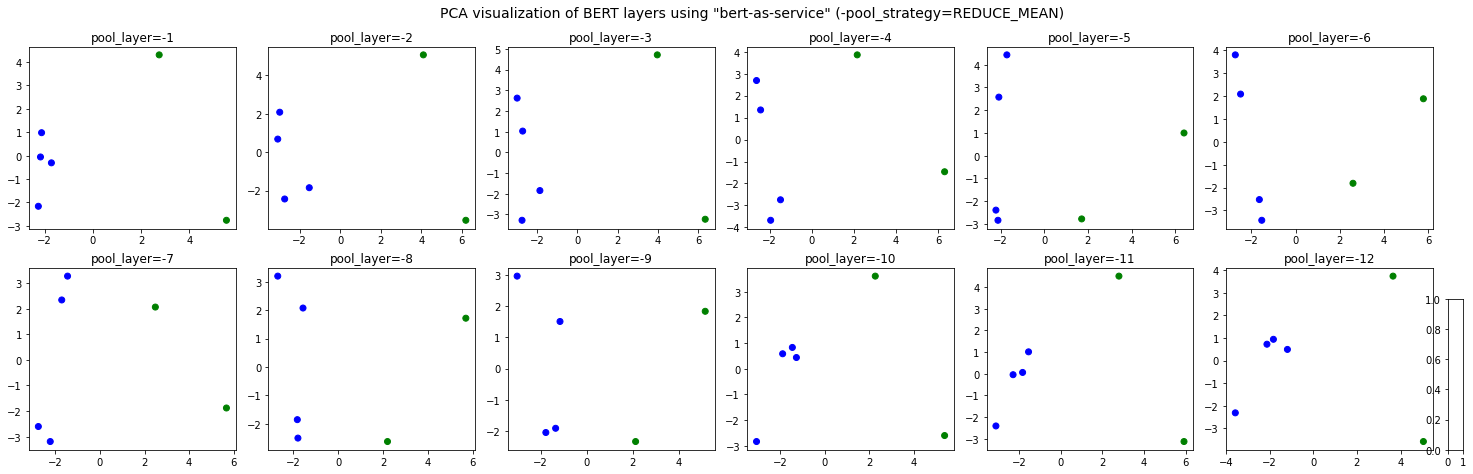

In [60]:
visualise_pca(pca_embed)

In [32]:
print(len(sentences))
print(len(music_sentences))
print(len(computer_sentences))

6
4
2
